In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [7]:
acc_df = pd.read_csv('acc_data_after_cleaning.csv',engine = 'python')
acc_df.head()

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,9,0,18,0,8,0,0,0,0,1,...,8,3,0,0,0,0,0,9,1,3
1,20,0,4,0,0,0,0,0,0,1,...,6,3,1,1,0,0,0,0,1,1
2,1,0,9,0,5,0,0,0,0,1,...,8,3,0,0,0,0,0,1,1,2
3,3,0,4,0,2,0,0,0,0,1,...,6,3,0,0,0,0,0,3,1,3
4,9,0,14,0,1,0,0,0,0,4,...,3,3,1,2,0,0,0,0,1,2


In [6]:
acc_df['casualty_severity'].value_counts()

3    162193
2     22130
1      1727
Name: casualty_severity, dtype: int64

In [3]:
acc_df.columns


Index(['vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_home_area_type',
       'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'time',
       'local_authority_(district)', 'local_authority_(highway)',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road

In [35]:
acc_cat = acc_df[['vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver','propulsion_code',
        'driver_home_area_type',
       'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index', 'police_force', 'accident_severity',
        'day_of_week', 
       'local_authority_(district)',
       '1st_road_class','road_type', 'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'casualty_reference', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']]

In [18]:
acc_cat.head()

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,9,0,18,0,8,0,0,0,0,1,...,8,3,0,0,0,0,0,9,1,3
1,20,0,4,0,0,0,0,0,0,1,...,6,3,1,1,0,0,0,0,1,1
2,1,0,9,0,5,0,0,0,0,1,...,8,3,0,0,0,0,0,1,1,2
3,3,0,4,0,2,0,0,0,0,1,...,6,3,0,0,0,0,0,3,1,3
4,9,0,14,0,1,0,0,0,0,4,...,3,3,1,2,0,0,0,0,1,2


In [19]:
print(acc_cat.dtypes)

vehicle_type                                        int64
towing_and_articulation                             int64
vehicle_manoeuvre                                   int64
vehicle_location-restricted_lane                    int64
junction_location                                   int64
skidding_and_overturning                            int64
hit_object_in_carriageway                           int64
vehicle_leaving_carriageway                         int64
hit_object_off_carriageway                          int64
1st_point_of_impact                                 int64
was_vehicle_left_hand_drive?                        int64
journey_purpose_of_driver                           int64
sex_of_driver                                       int64
age_of_driver                                       int64
age_band_of_driver                                  int64
propulsion_code                                     int64
driver_home_area_type                               int64
NUmber_of_Casu

# Chi-Square Test for Feature Selection in Machine learning

In [7]:
from sklearn.feature_selection import chi2

In [20]:
X = acc_cat.drop('casualty_severity',axis=1)
y = acc_cat['casualty_severity']

In [21]:
chi_scores = chi2(X,y)


In [22]:
chi_scores

(array([1.32462718e+03, 1.04735249e+02, 7.18336897e+03, 4.39639138e+02,
        2.01812931e+03, 2.46803011e+03, 1.87174148e+03, 5.94099077e+03,
        6.61178027e+03, 2.28267304e+02, 3.45949254e-02, 8.68748189e+01,
        2.05112002e+02, 1.90975325e+03, 9.38865157e+01, 1.94155631e+02,
        9.78824403e+01, 2.86537789e+02, 5.21899026e+02, 1.25249024e+04,
        8.59023422e+03, 9.78907739e-01, 1.31388873e+05, 1.12276594e+02,
        1.52661489e+02, 1.13879026e+03, 2.01812931e+03, 2.01812931e+03,
        2.92652234e+05, 9.18216887e+00, 2.43800297e+02, 8.74223496e+02,
        2.38615987e+01, 1.05856564e+00, 8.61041301e+00, 7.08317221e+00,
        1.85970723e+02, 1.56856309e+02, 2.98108847e+02, 2.20975948e+02,
        2.50252094e+02, 9.04993125e+03, 5.58566636e+02, 9.28103035e+03,
        5.45711774e+03, 1.01972265e+03, 6.62808820e+02, 2.66135728e+01,
        7.60789853e+03, 7.50935776e+01, 1.10449878e+02]),
 array([2.29542335e-288, 1.80729742e-023, 0.00000000e+000, 3.41644324e-096,
  

In [23]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

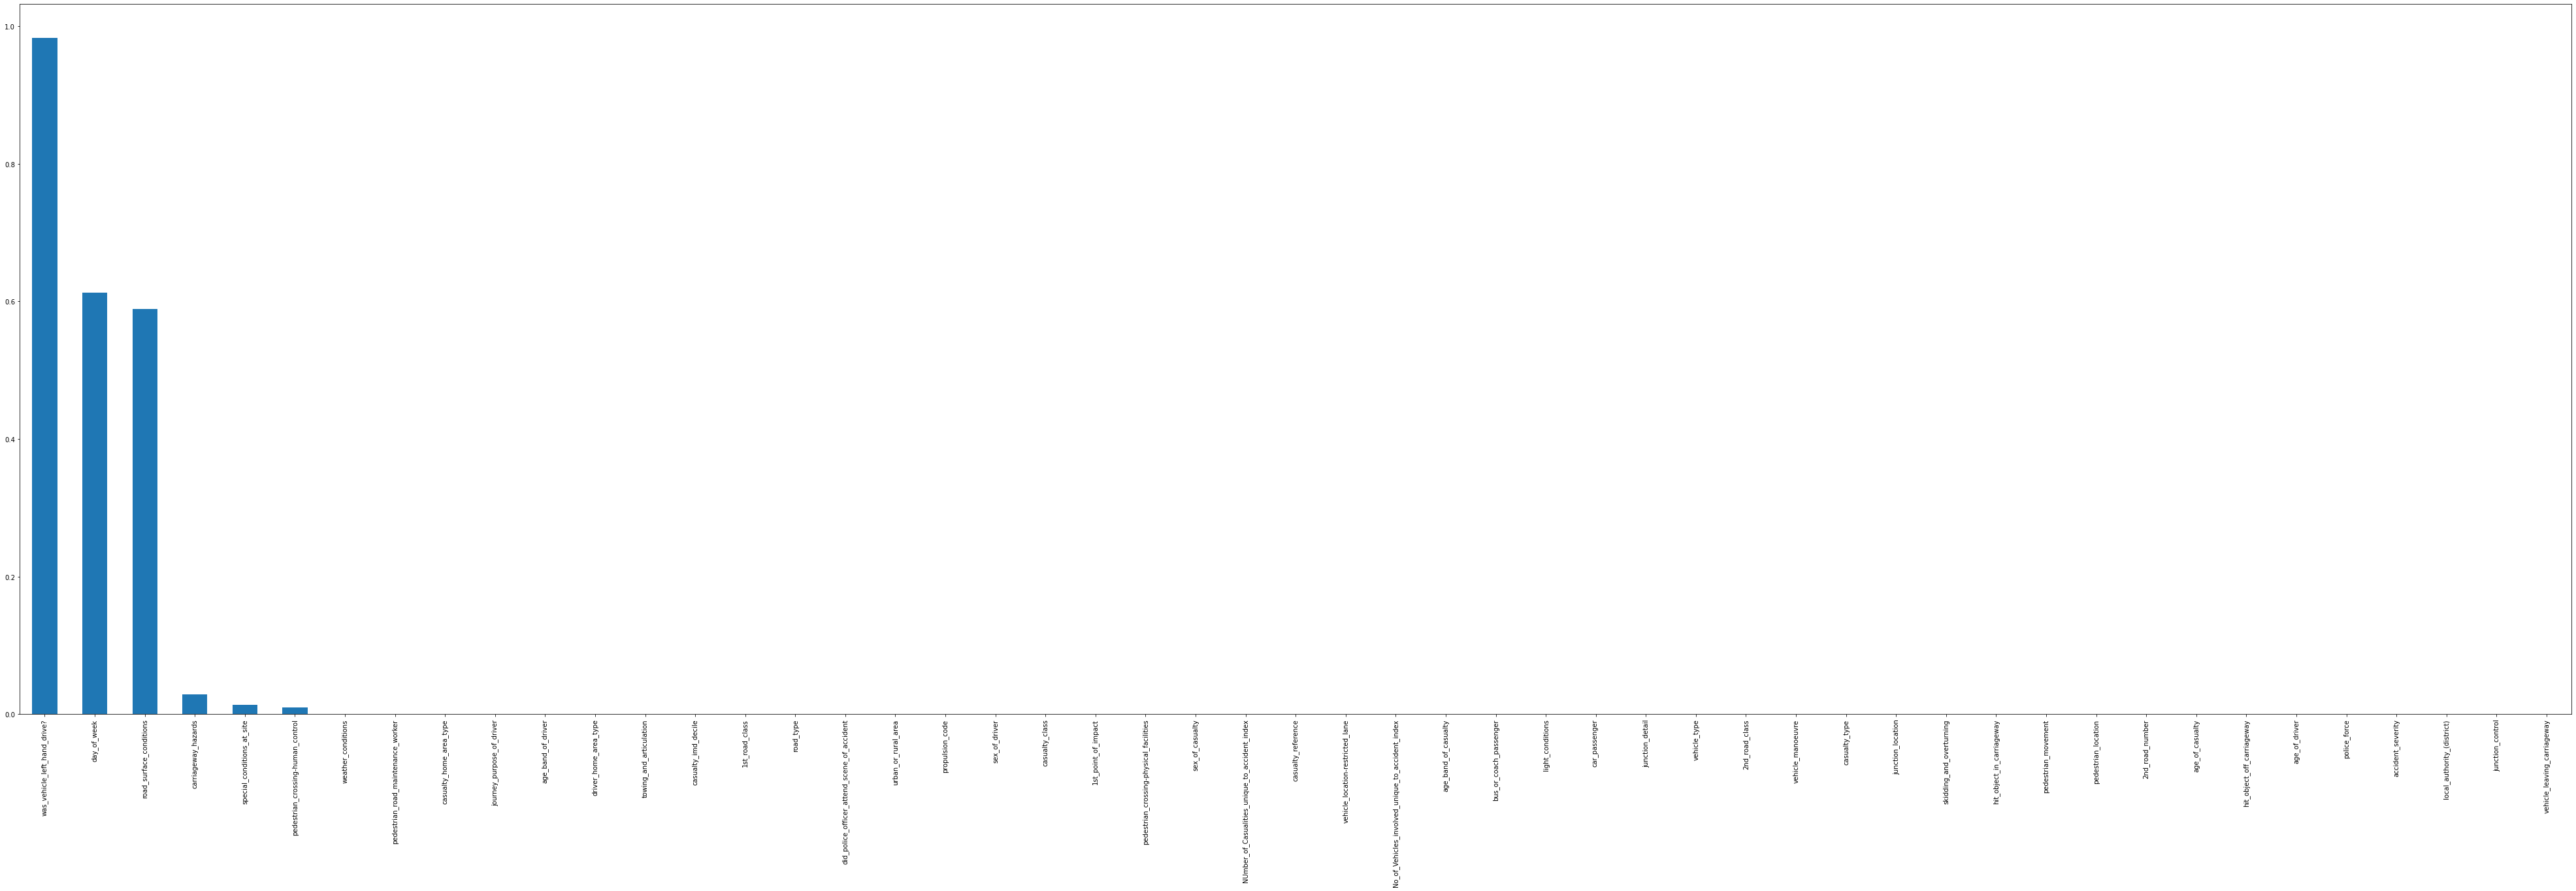

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(70,20))
p_values.plot.bar()
plt.show()

here since was_driver_left has higher value then it can be eliminated since was_driver_left and accident_severity variables are independent, was_driver_left variable cannot be selected for training the model.

# Cramer_V for Feature Selection in Machine learning

In [38]:
acc_obj = acc_cat.copy() 

cramer_v need categorical data

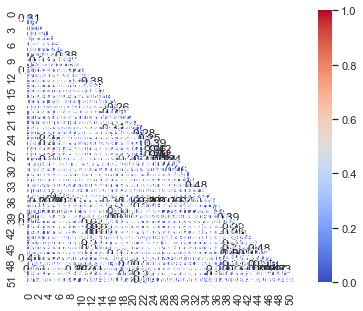

In [59]:
acc_obj = acc_obj.astype('category')

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


# compute Cramér's V for all pairs of columns
n = acc_obj.shape[1]
cramer_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(i+1,n):
        cramer_matrix[i,j] = cramers_v(acc_obj.iloc[:,i], acc_obj.iloc[:,j])
        cramer_matrix[j,i] = cramer_matrix[i,j]

# create a heatmap of Cramér's V values
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')
mask = np.zeros_like(cramer_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(cramer_matrix, mask=mask, cmap='coolwarm', square=True, annot=True)
plt.show()

In [60]:
cramer_matrix

array([[0.        , 0.31019908, 0.08306463, ..., 0.91364376, 0.08247534,
        0.03782683],
       [0.31019908, 0.        , 0.01300241, ..., 0.29434544, 0.02330358,
        0.01116955],
       [0.08306463, 0.01300241, 0.        , ..., 0.10701552, 0.0929601 ,
        0.02511452],
       ...,
       [0.91364376, 0.29434544, 0.10701552, ..., 0.        , 0.10203197,
        0.04634396],
       [0.08247534, 0.02330358, 0.0929601 , ..., 0.10203197, 0.        ,
        0.2004216 ],
       [0.03782683, 0.01116955, 0.02511452, ..., 0.04634396, 0.2004216 ,
        0.        ]])

In [44]:
from scipy.stats import chi2_contingency

In [49]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_vars = acc_obj.select_dtypes(include=['object']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)
for row in categorical_vars:
    for col in categorical_vars:
        cramers_v_matrix.loc[row, col] = cramers_v(acc_obj[row], acc_obj[col])


NameError: name 'np' is not defined

In [55]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []



for var1 in acc_obj:
  col = []
  for var2 in acc_obj :
    cramers =cramers_V(acc_obj[var1], acc_obj[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = acc_obj.columns, index =acc_obj.columns)

In [77]:
# Find the maximum Cramer's V value and variable pairs with Cramer's V value > threshold
threshold = 0.9

max_cramer = df[df < 1].max().max() # Maximum value of Cramer's V
var_pairs = df[df == max_cramer].stack().reset_index() # Variable pairs with maximum value of Cramer's V

print("Maximum Cramer's V value: ", max_cramer)
print("Variable pairs with Cramer's V value > {}: ".format(threshold))
print(var_pairs[var_pairs[0] > threshold])

Maximum Cramer's V value:  0.83
Variable pairs with Cramer's V value > 0.9: 
Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [91]:
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if "casualty_severity" in [df.columns[j]]:
            print(f"{df.columns[i]} - {df.columns[j]}: {df.iloc[i, j]:.2f}")

vehicle_type - casualty_severity: 0.02
towing_and_articulation - casualty_severity: 0.00
vehicle_manoeuvre - casualty_severity: 0.01
vehicle_location-restricted_lane - casualty_severity: 0.00
junction_location - casualty_severity: 0.00
skidding_and_overturning - casualty_severity: 0.00
hit_object_in_carriageway - casualty_severity: 0.00
vehicle_leaving_carriageway - casualty_severity: 0.01
hit_object_off_carriageway - casualty_severity: 0.00
1st_point_of_impact - casualty_severity: 0.01
was_vehicle_left_hand_drive? - casualty_severity: 0.00
journey_purpose_of_driver - casualty_severity: 0.00
sex_of_driver - casualty_severity: 0.00
age_of_driver - casualty_severity: 0.00
age_band_of_driver - casualty_severity: 0.00
propulsion_code - casualty_severity: 0.00
driver_home_area_type - casualty_severity: 0.00
NUmber_of_Casualities_unique_to_accident_index - casualty_severity: 0.00
No_of_Vehicles_involved_unique_to_accident_index - casualty_severity: 0.01
police_force - casualty_severity: 0.01

In [92]:
for col in acc_obj.columns:
    if col != "casualty_severity":
        cramers = cramers_V(acc_obj[col], acc_obj["casualty_severity"])
        print(f"{col} - casualty_severity: {round(cramers, 2)}")

vehicle_type - casualty_severity: casualty_severity
1    2.10
2    0.16
3    0.02
dtype: float64
towing_and_articulation - casualty_severity: casualty_severity
1    0.05
2    0.00
3    0.00
dtype: float64
vehicle_manoeuvre - casualty_severity: casualty_severity
1    1.31
2    0.10
3    0.01
dtype: float64
vehicle_location-restricted_lane - casualty_severity: casualty_severity
1    0.04
2    0.00
3    0.00
dtype: float64
junction_location - casualty_severity: casualty_severity
1    0.34
2    0.03
3    0.00
dtype: float64
skidding_and_overturning - casualty_severity: casualty_severity
1    0.39
2    0.03
3    0.00
dtype: float64
hit_object_in_carriageway - casualty_severity: casualty_severity
1    0.10
2    0.01
3    0.00
dtype: float64
vehicle_leaving_carriageway - casualty_severity: casualty_severity
1    0.59
2    0.05
3    0.01
dtype: float64
hit_object_off_carriageway - casualty_severity: casualty_severity
1    0.48
2    0.04
3    0.01
dtype: float64
1st_point_of_impact - casualty_s

In [64]:
df

,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
vehicle_type,1.00,0.10,0.01,0.02,0.01,0.01,0.00,0.00,0.00,0.04,...,0.01,0.02,0.00,0.00,0.05,0.18,0.00,0.83,0.01,0.00
towing_and_articulation,0.10,1.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00
vehicle_manoeuvre,0.01,0.00,1.00,0.01,0.05,0.02,0.00,0.02,0.01,0.11,...,0.00,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.00
vehicle_location-restricted_lane,0.02,0.00,0.01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.02,0.00,0.00
junction_location,0.01,0.00,0.05,0.00,1.00,0.01,0.01,0.01,0.01,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00
skidding_and_overturning,0.01,0.03,0.02,0.00,0.01,1.00,0.01,0.04,0.03,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00
hit_object_in_carriageway,0.00,0.00,0.00,0.00,0.01,0.01,1.00,0.02,0.01,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
vehicle_leaving_carriageway,0.00,0.00,0.02,0.00,0.01,0.04,0.02,1.00,0.14,0.01,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00
hit_object_off_carriageway,0.00,0.00,0.01,0.00,0.01,0.03,0.01,0.14,1.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
1st_point_of_impact,0.04,0.00,0.11,0.00,0.01,0.01,0.00,0.01,0.01,1.00,...,0.00,0.01,0.01,0.01,0.00,0.05,0.00,0.06,0.00,0.00


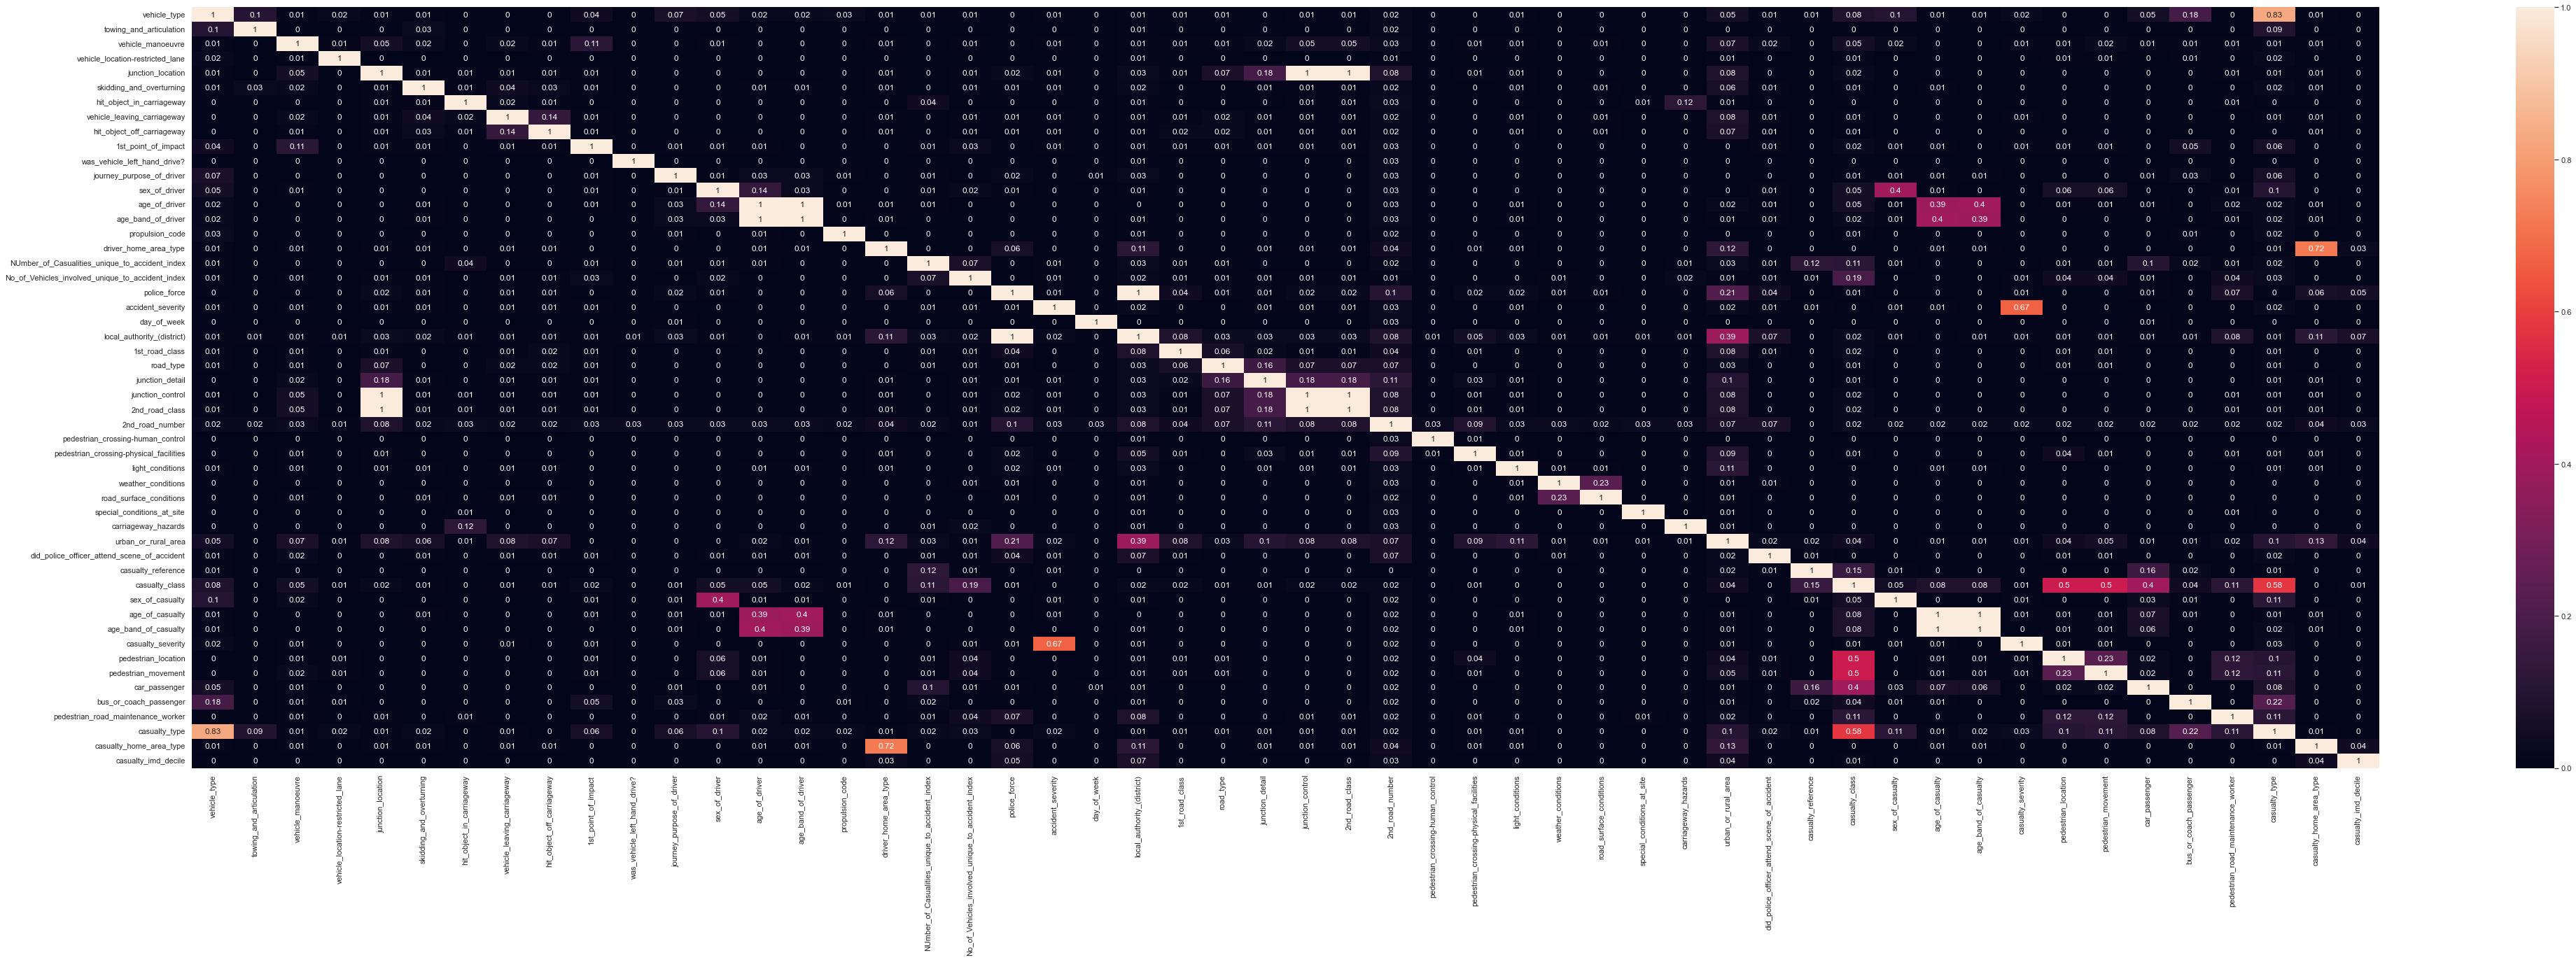

In [67]:
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
fig, ax = plt.subplots(figsize=(70,20))
# plotting the heatmap
hm = sns.heatmap(data=df,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()

In [84]:
rows= []



for var1 in acc_obj:
  col = []
  for var2 in acc_obj :
    cramers =cramers_V(acc_obj[var1], acc_obj['casualty_severity']) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)

cramers_df = pd.DataFrame(cramers_results, columns = acc_obj.columns, index =acc_obj.columns)

In [85]:
cramers_results

array([[0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       ...,
       [0.03, 0.03, 0.03, ..., 0.03, 0.03, 0.03],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [88]:
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
    crosstab = pd.crosstab(var1,var2)
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (stat/(obs*mini))

# Let's assume your target variable is "target" and it's a categorical variable

# Loop over all columns except the target variable
for col in acc_obj.columns[acc_obj.columns != "casualty_severity"]:
    cramers = cramers_V(acc_obj[col], acc_obj["casualty_severity"])
    print(f"{col} : {round(cramers, 2)}")


vehicle_type : casualty_severity
1    2.10
2    0.16
3    0.02
dtype: float64
towing_and_articulation : casualty_severity
1    0.05
2    0.00
3    0.00
dtype: float64
vehicle_manoeuvre : casualty_severity
1    1.31
2    0.10
3    0.01
dtype: float64
vehicle_location-restricted_lane : casualty_severity
1    0.04
2    0.00
3    0.00
dtype: float64
junction_location : casualty_severity
1    0.34
2    0.03
3    0.00
dtype: float64
skidding_and_overturning : casualty_severity
1    0.39
2    0.03
3    0.00
dtype: float64
hit_object_in_carriageway : casualty_severity
1    0.10
2    0.01
3    0.00
dtype: float64
vehicle_leaving_carriageway : casualty_severity
1    0.59
2    0.05
3    0.01
dtype: float64
hit_object_off_carriageway : casualty_severity
1    0.48
2    0.04
3    0.01
dtype: float64
1st_point_of_impact : casualty_severity
1    0.98
2    0.08
3    0.01
dtype: float64
was_vehicle_left_hand_drive? : casualty_severity
1    0.01
2    0.00
3    0.00
dtype: float64
journey_purpose_of_drive